<a href="https://colab.research.google.com/github/SaiRohithkandula/Code19hackerearth/blob/master/Kandula_Sai_Durga_Rohith_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ICE-6**: Simple Linear Regression

###**INSTRUCTIONS**
#####Provide your observation/summary for all tutorials and tasks. Marks will be deducted for those who dont write the summary.
#####Print this file as pdf and submit both pdf and .ipynb file(No screenshots). Not submitting any of these files will impact their grades.


###Tutorial

###1.Importing the required libraries

In [ ]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


###2. Understanding the data

In [ ]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###3. Visualizing the data
####Scatter Plot

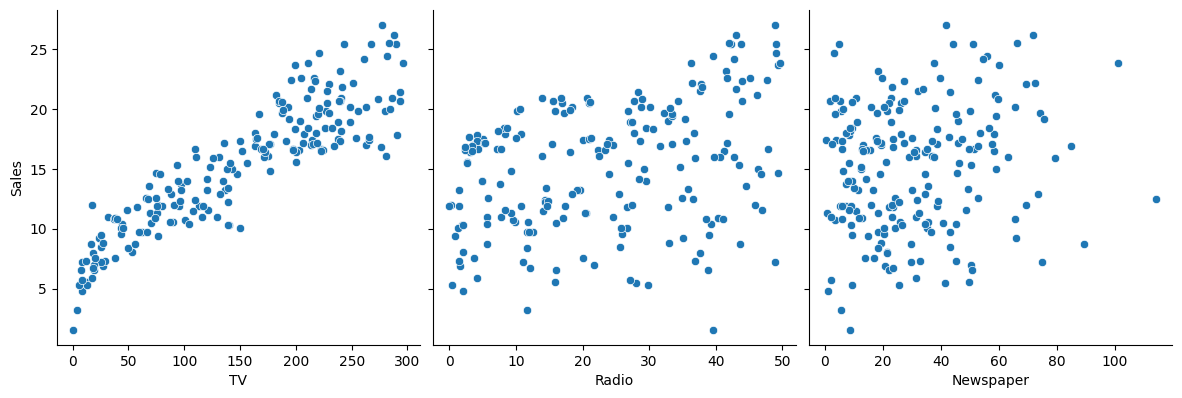

In [ ]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'],
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

####HeatMap

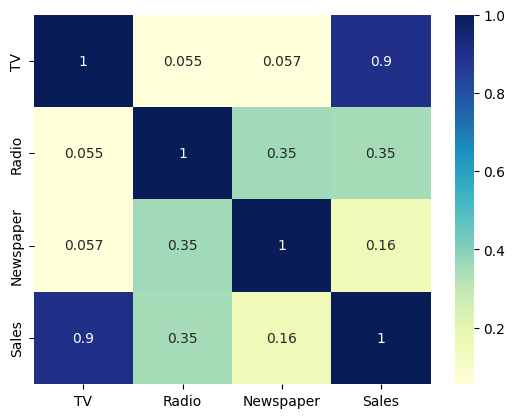

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

####4.Performing Simple Linear Regression

In [ ]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

####5. Create Train and Test sets

In [ ]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

####Training dataset

In [ ]:
# Take a look at the train dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

####6. Building and training the model

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        21:36:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####7.Bestfit Regression Line

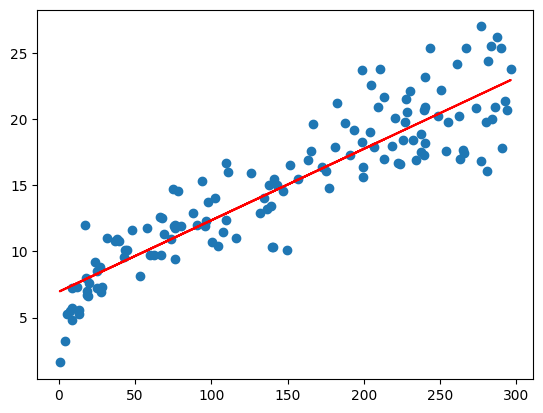

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

####8. Residual Analysis

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

####Histogram

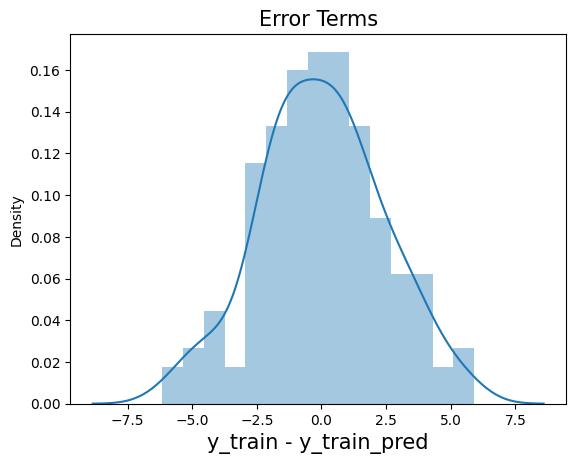

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

####Scatter Plot

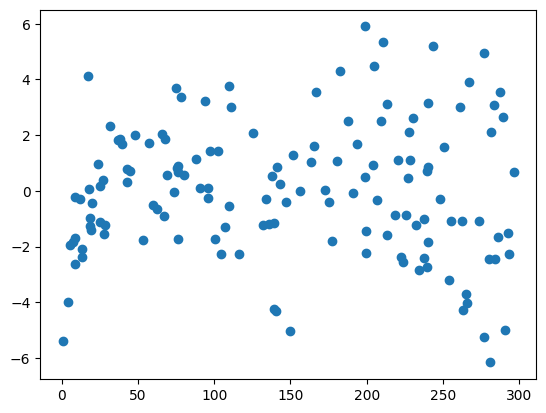

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

####9. Predictions on the Test data or Evaluating the model

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.792103160124566

####10. visualizing the line on test data

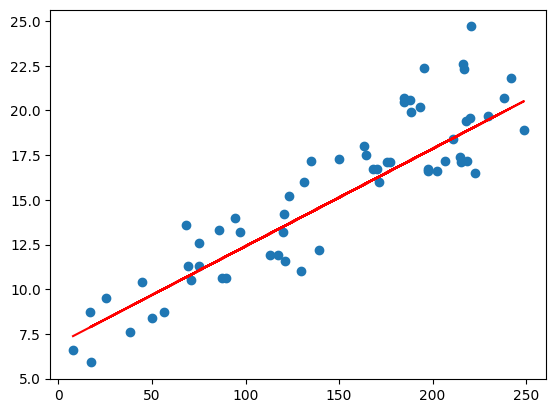

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 100)

In [ ]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

####11. Calculating intercept and slope values

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


####12. Evaluating the model

In [ ]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


#Write the observations of the above tutorial here**(10%)**

We had linear regression by importing the necessary libraries, including pandas, numpy, matplotlib, seaborn, and statsmodels. By reading the dataset from a CSV file, dividing it into training and testing sets using `train test split', and reshaping the data to be compatible with the model, we highlighted the critical role of data preprocessing. Variable correlations and relationships could be better understood thanks to the data visualization techniques used, such as pair plots and heatmaps. Next, we trained and evaluated the model using the Ordinary Least Squares (OLS) approach, which allows us to fit the model to the training set of data. A layer of interpretability was added by extracting and displaying the model's parameters, such as the intercept and coefficients. The model was then applied to training and testing datasets to generate predictions, and its performance was assessed using the R-squared metric. Most importantly, we reinforced the predictive power of the model by displaying the regression line on both datasets, highlighting the importance of visualization. Finally, we carried out a comprehensive residual analysis that clarified the discrepancies between the actual and predicted values. The output r2 values had almost been similar (0.8) for both the train and test datasets.







#Task 1:
Perform linear regression on the tutorial given using the dataset attached.After you are successful in executing and fixing the issues with the current version, use dataset of your choice and execute it again.**(30%)**

In [32]:
#Custom Dataset


import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd


Experience = pd.read_csv("Experience-Salary.csv")
Experience

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [33]:
# Shape of our dataset
Experience.shape

# Info our dataset
Experience.info()

# Describe our dataset
Experience.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


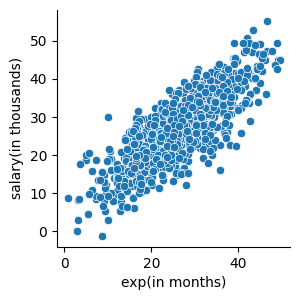

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(Experience, x_vars=['exp(in months)'],
             y_vars='salary(in thousands)', size=3, aspect=1, kind='scatter')
plt.show()

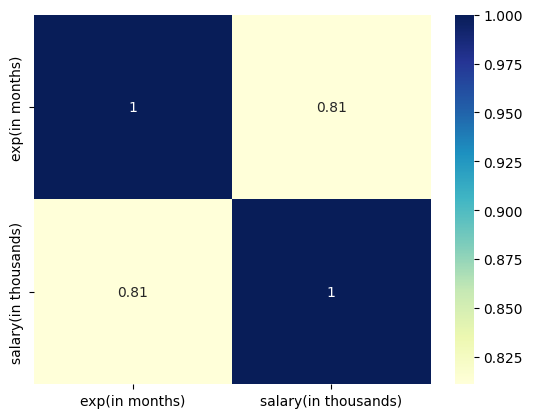

In [38]:
sns.heatmap(Experience.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [39]:
X = Experience['exp(in months)']
y = Experience['salary(in thousands)']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [41]:
X_train
y_train

420    40.612278
278    40.753600
218    23.290345
363    37.119836
850    33.684060
         ...    
855    22.635967
871    23.431335
835    13.209591
792    23.674131
520    37.137573
Name: salary(in thousands), Length: 700, dtype: float64

In [42]:
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)

In [44]:
lr = sm.OLS(y_train, X_train_sm).fit()


lr.params

const             4.831408
exp(in months)    0.839185
dtype: float64

In [45]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     salary(in thousands)   R-squared:                       0.679
Model:                              OLS   Adj. R-squared:                  0.678
Method:                   Least Squares   F-statistic:                     1475.
Date:                  Mon, 16 Oct 2023   Prob (F-statistic):          2.71e-174
Time:                          00:06:46   Log-Likelihood:                -2114.1
No. Observations:                   700   AIC:                             4232.
Df Residuals:                       698   BIC:                             4241.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8314      0.601      8.043      0.000       3.652       6.011
exp(in months)     0.8392      0.022     38.406      0.000       0.796       0.882
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.327
Skew:                          -0.106   Prob(JB):                        0.515
Kurtosis:                       2.981   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

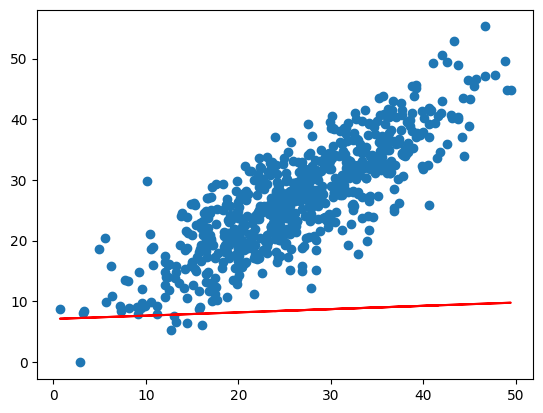

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.100 + 0.054*X_train, 'r')
plt.show()

In [50]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

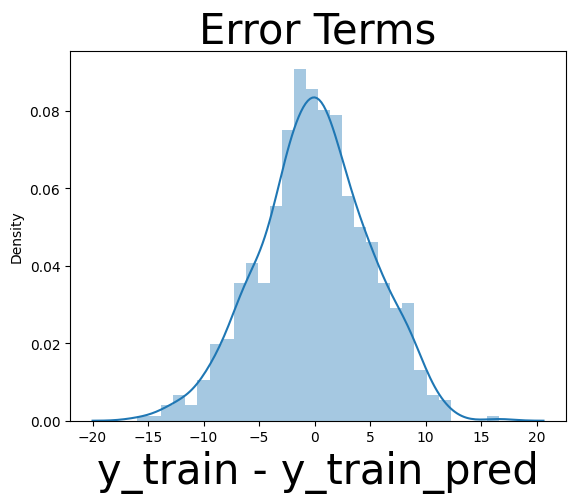

In [51]:
fig = plt.figure()
sns.distplot(res, bins = 30)
plt.title('Error Terms', fontsize = 30)
plt.xlabel('y_train - y_train_pred', fontsize = 30)
plt.show()

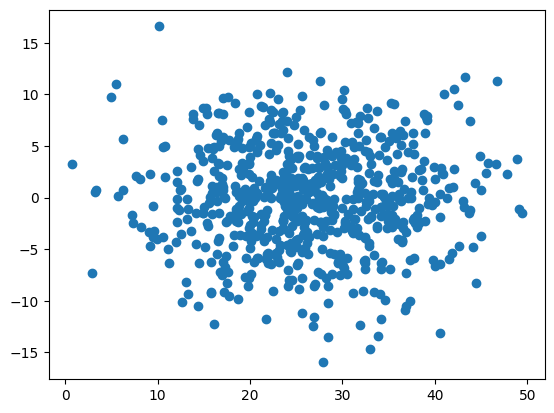

In [53]:
plt.scatter(X_train,res)
plt.show()

In [54]:
X_test_sm = sm.add_constant(X_test)


y_test_pred = lr.predict(X_test_sm)

y_test_pred

249    17.104964
353    13.493695
537    34.869809
424    21.816280
564    30.076584
         ...    
193    21.833381
838    37.560368
974    31.093372
203    27.708626
425    31.167759
Length: 300, dtype: float64

In [55]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6105799804954883

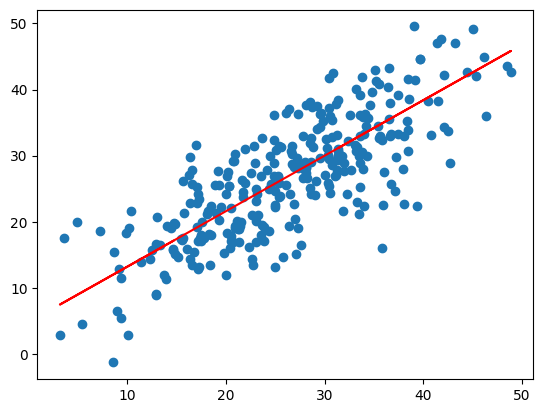

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 100)

In [58]:
X_train_lm.shape


X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(700, 1)
(300, 1)


In [59]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()


lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [60]:

print("Intercept :",lm.intercept_)

print('Slope :',lm.coef_)

Intercept : 4.831407595170152
Slope : [0.83918488]


In [61]:

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6787901441134987
0.6105799804954881


We had taken the dataset experience-salary.csv and performed the linear regression on the dataset. When we compare both the r2-values they are almost equal as this shows us the model is suitable to predict the outcome.

#Task 2:
###Question 2a:
Write the applications of Linear Regression.**(10%)**
###Question 2b:
What are the basic assumptions and disadvantages of the linear regression algorithm.**(10%)**

**2a.**


Applications of Linear Regression Algorithm

Estimating Grades that students receive according to how many hours they study.

Estimating crop yields by considering rainfall data.

Estimating an individual's salary depending on their years of experience.


It is used in social sciences to investigate behaviors and correlations between variables. To forecast system behaviors and improve designs, engineers use linear regression. Manufacturing and quality control use it to raise the caliber of their products. Its versatility and usefulness in a variety of industries are further demonstrated by its applications in real estate, sports analytics, agriculture, and other areas.









**2b.**

Basic Assumptions in Linear Regression Algorithm

**Linearity**
There is a linear relationship between X and Y.


**Independence of Errors**
Statistically independent error values are especially significant when data are gathered over an extended period of time.


**Normality of Error**
For every X value, the error values follow a normal distribution.


**Equal Variance**
There is constant variance in the probability distribution of the errors.

Disadvantages of linear regression algortihm

**Overfitting and Underfitting**
 When a linear regression model is either too complex for the data or too simple to capture patterns, it is said to be overfitted. Finding the ideal balance is essential to making precise forecasts.

 **Managing Missing Data**
 Complete data is necessary for linear regression. Effectively managing missing data can be difficult, and imputation methods can introduce bias.



**Multicollinearity**
Determining the individual commitments of associated indicators can also be difficult due to multicollinearity. Multicollinearity-related problems can be mitigated by careful variable selection or techniques such as foremost component analysis or ridge regression.

**Sensitivity to Exceptions**
Exceptions are exceptional observations that fundamentally deviate from the common design of the data, and linear regression is sensitive to these. Exceptions have the potential to significantly alter the regression coefficients and the demonstration's overall fit. To prevent exceptions from distorting the results, it is crucial to identify them and deal with them appropriately.



#Task 3:
####Question 3(a):
Given the data of individuals and their healthcare charges billed by their insurance provider.Here, "charges" will be the dependent variable and all the other variables are independent variables.Create another feature based called BMI_group which groups people based on their BMI. The groups should be as follows:**(20%)**

#####Underweight: BMI is less than 18.5.
#####Normal: BMI is 18.5 to 24.9.
#####Overweight: BMI is 25 to 29.9.
#####Obese: BMI is 30 or more.

In [ ]:
import pandas as pd


insurance_df = pd.read_csv("insurance.csv")


def assign_bmi_group(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'



insurance_df['BMI_group'] = insurance_df['bmi'].apply(assign_bmi_group)


print(insurance_df[['bmi', 'BMI_group']])


         bmi   BMI_group
0     27.900  Overweight
1     33.770       Obese
2     33.000       Obese
3     22.705      Normal
4     28.880  Overweight
...      ...         ...
1333  30.970       Obese
1334  31.920       Obese
1335  36.850       Obese
1336  25.800  Overweight
1337  29.070  Overweight

[1338 rows x 2 columns]


We had Created a seperate Group called "BMI_Group" for bmi values as follows :
Underweight: BMI is less than 18.5.
Normal: BMI is 18.5 to 24.9.
Overweight: BMI is 25 to 29.9.
Obese: BMI is 30 or more.

####Question 3(b):
Encode all categorical features such that they can be used in a regression model. i.e.sex, BMI_group, smoker and region should be labelled properly. Use the label encoder for all features.**(20%)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
insurance_df = pd.read_csv("insurance.csv")
insurance_df = pd.read_csv("insurance.csv")


def assign_bmi_group(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'



insurance_df['BMI_group'] = insurance_df['bmi'].apply(assign_bmi_group)


print(insurance_df[['bmi', 'BMI_group']])


# List of categorical features to be encoded
categorical_features = ['sex', 'BMI_group', 'smoker', 'region']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical feature
for feature in categorical_features:
    insurance_df[feature + '_encoded'] = label_encoder.fit_transform(insurance_df[feature])

# Display the updated DataFrame with encoded features
print(insurance_df[['sex', 'sex_encoded', 'BMI_group', 'BMI_group_encoded', 'smoker', 'smoker_encoded', 'region', 'region_encoded']])


         bmi   BMI_group
0     27.900  Overweight
1     33.770       Obese
2     33.000       Obese
3     22.705      Normal
4     28.880  Overweight
...      ...         ...
1333  30.970       Obese
1334  31.920       Obese
1335  36.850       Obese
1336  25.800  Overweight
1337  29.070  Overweight

[1338 rows x 2 columns]
         sex  sex_encoded   BMI_group  BMI_group_encoded smoker  \
0     female            0  Overweight                  2    yes   
1       male            1       Obese                  1     no   
2       male            1       Obese                  1     no   
3       male            1      Normal                  0     no   
4       male            1  Overweight                  2     no   
...      ...          ...         ...                ...    ...   
1333    male            1       Obese                  1     no   
1334  female            0       Obese                  1     no   
1335  female            0       Obese                  1     no   
1336 

We had encoded and labeled all the categorical features  sex, BMI_group, smoker and region and gave thenm values such as Sex - male(1),female(0), Bmi_group - Normal(0),Obese(1),Overweight(2), Underweight(3), Smoke - yes (1), No(0) and Region - Northeast(0), Northwest (1),Southeast(2), Southwest(3).